In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 신경망 모델 훈련

**[핵심키워드]** 손실곡선, 드롭아웃(dropout), 콜백(callback), 조기종료  

- 인공신경망 모델을 훈련하는 모범 사례와 필요한 도구 학습
- 드롭아웃: 규제를 통헤 과적합 방지하는 방법

### 데이터 준비

In [3]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

#데이터 정규화
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

X_tr, X_val, y_tr, y_val = train_test_split(train_input, train_target,
                                           test_size=0.2, random_state=42) 

In [4]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']

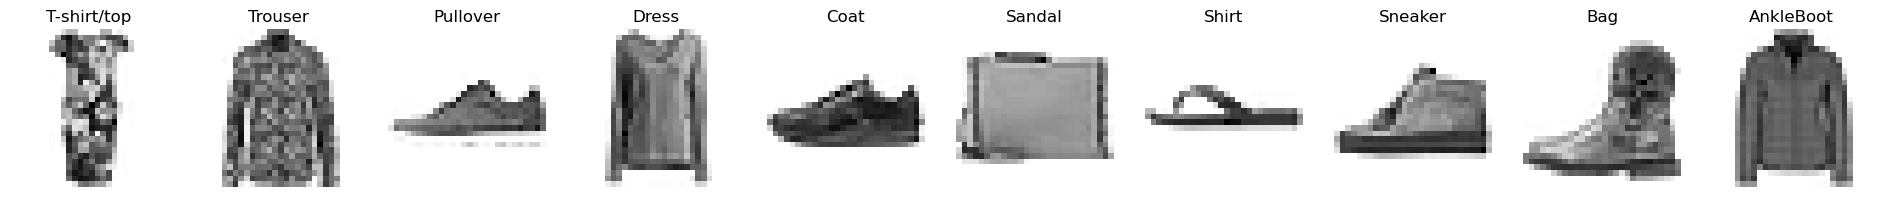

In [5]:
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=10)
for i in range(10):
    img = test_input[i+100]
    axs[i].imshow(img, cmap=plt.cm.binary) #cmap = 'gray_r'로 줘도 됨
    axs[i].set_title(target_names[i])    
    axs[i].axis('off')

### 모델 생성 함수 정의

: 함수의 a_layer 매개변수는 케라스 층으로서, 은닉층 뒤에 층을 추가하는 함수

In [6]:
from keras import Sequential
from keras.layers import Dense, Flatten

def build_model(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28))) #flatten : 1차원으로 펼치는 것
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

In [7]:
def build_model2(a_layer=None):
    model = Sequential()
    model.add(Input(shape=(28*28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

### 모델 생성하고 모델의 정보 출력

In [8]:
model = build_model()
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일 및 훈련
: 훈련된 모델 객체를 변수 history에 저장  

In [9]:
model.compile(loss='sparse_categorical_crossentropy', 
               metrics=['accuracy']) #optimizer는 디폴트로
history = model.fit(X_tr, y_tr, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.6442 - loss: 13.9923
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.7574 - loss: 0.8416
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.7865 - loss: 0.7389
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8110 - loss: 0.7092
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.8177 - loss: 0.6656


- history 객체는 딕셔너리 형식으로 훈련 측정값이 저장되어 있음
    - loss와 accuracy : 에포크마다 계산한 값이 순서대로 리스트에 저장

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [11]:
history.history['loss']

[4.175970554351807,
 0.8222573399543762,
 0.7362403869628906,
 0.7065550684928894,
 0.673598051071167]

## 손실 곡선

### history 속성에 포함된 손실(loss)과 정확도(accuracy) 시각화

In [12]:
def draw_metric_plot(history):
    plt.figure(figsize=(10,5))
#     n = len(history.history['loss'])
    for i, item in enumerate(history.history.keys()):
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item], label=item)
        plt.xlabel('epoch')
        plt.ylabel(item)
        plt.title(item + ' plot')
    plt.legend()
    plt.show()

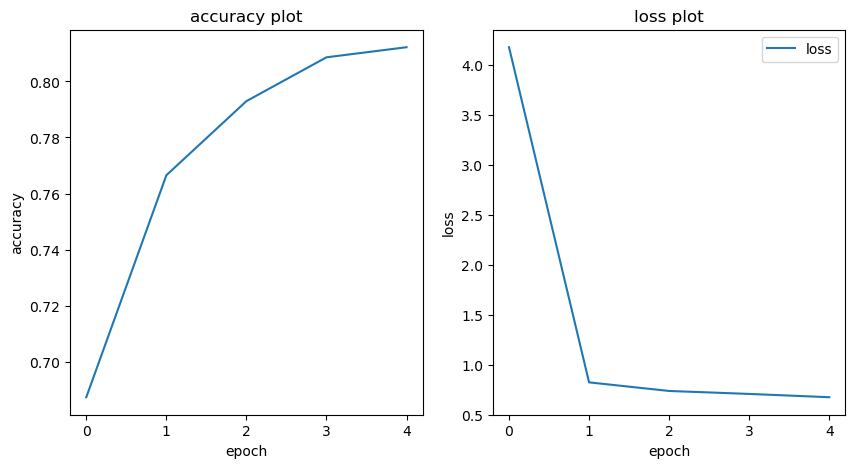

In [13]:
draw_metric_plot(history)

### epochs=20 인 경우 모델 훈련 후 loss 값 시각화

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.6317 - loss: 12.9936
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7019 - loss: 0.9034
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7220 - loss: 0.8302
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.7355 - loss: 0.7876
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7598 - loss: 0.7777
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.7592 - loss: 0.7445
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7753 - loss: 0.7112
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.7743 - loss: 0.6944
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7817 - loss: 0.6950
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.7934 - loss: 0.7036
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7947 - loss: 0.7261
Epoch 12/

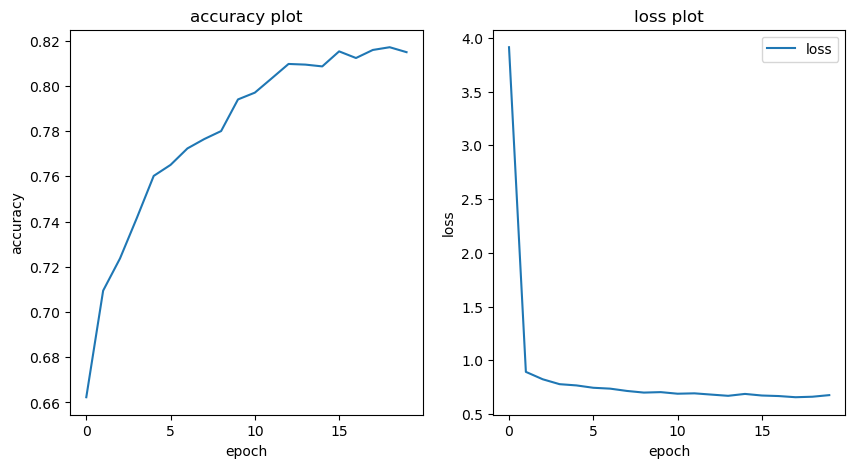

In [14]:
model3 = build_model()
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model3.fit(X_tr, y_tr, epochs=20)
draw_metric_plot(history2)

#### [문제1] epochs=40으로 학습한 경우 accuracy 값을 그래프로 그려보시오

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.6314 - loss: 12.5374
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7115 - loss: 0.8411
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7496 - loss: 0.7730
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7647 - loss: 0.7354
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.7689 - loss: 0.7471
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7781 - loss: 0.7196
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.7844 - loss: 0.6980
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.7919 - loss: 0.6706
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8045 - loss: 0.6568
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.8131 - loss: 0.6325
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.8193 - loss: 0.6057
Epoch 12/40

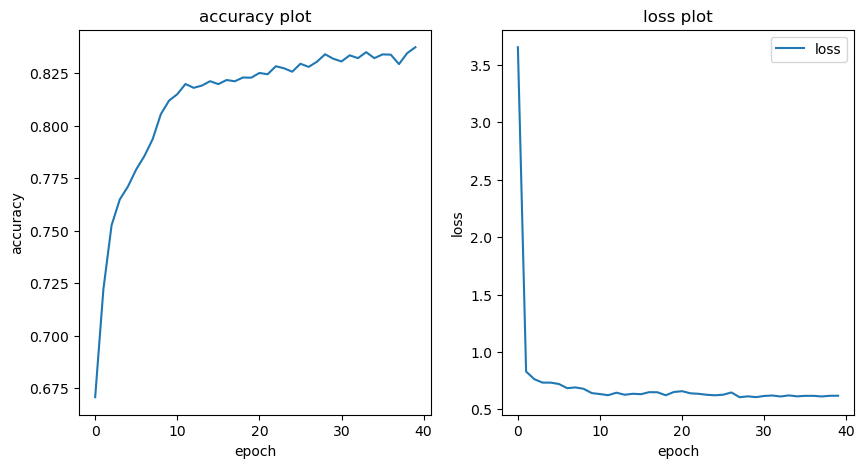

In [15]:
model4 = build_model()
model4.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model4.fit(X_tr, y_tr, epochs=40)
draw_metric_plot(history3)

## 검증 손실

- 에포크에 따라 과대적합과 과소적합이 달라짐
- 인공신경망 모델이 최적화하는 대상을 정확도가 아니라 손실함수
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음
    - 모델이 잘 훈련되었는지 판단하기 위해서는 정확도보다는 손실함수의 값을 확인

#### 에포크마다 검증 손실 계산
- fit() 메서드의 **validation_data** 매개변수에 검증 데이터를 전달
- 검증할 입력과 타깃값은 튜플로 전달

In [16]:
epochs = 20
model5 = build_model()
model5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history4 = model5.fit(X_tr, y_tr, epochs=epochs, verbose=0, #verbose =0하면 과정이 안보임
                     validation_data=(X_val, y_val))
history4.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### 검증데이터에 대한 손실과 정확도는 val_loss, val_accuracy에 저장

In [17]:
print(history4.history)

{'accuracy': [0.6996458172798157, 0.7552499771118164, 0.7835000157356262, 0.7933541536331177, 0.7981041669845581, 0.8005416393280029, 0.8018333315849304, 0.8061458468437195, 0.8053125143051147, 0.8089166879653931, 0.8058750033378601, 0.8111041784286499, 0.8139374852180481, 0.8130208253860474, 0.8119791746139526, 0.8143541812896729, 0.8134791851043701, 0.8138750195503235, 0.8131041526794434, 0.8179583549499512], 'loss': [5.075803279876709, 0.851024329662323, 0.7789562344551086, 0.7466285228729248, 0.7437918186187744, 0.7317513227462769, 0.7249693274497986, 0.737896740436554, 0.6935442090034485, 0.7059170603752136, 0.695523202419281, 0.692699134349823, 0.6986903548240662, 0.6844938397407532, 0.6894727349281311, 0.6843113899230957, 0.6774397492408752, 0.680451512336731, 0.6801290512084961, 0.665102481842041], 'val_accuracy': [0.7268333435058594, 0.7738333344459534, 0.781499981880188, 0.793833315372467, 0.7905833125114441, 0.7877500057220459, 0.7995833158493042, 0.7836666703224182, 0.80216

#### 훈련데이터와 검증데이터에 대한 손실과 정확도 시각화

In [18]:
list(history4.history.keys())

['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [19]:
def draw_metric_plot2(history):
    loss = ['loss', 'val_loss']
    acc = ['accuracy', 'val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item[0]], label='train')
        plt.plot(history.history[item[1]], label='validation')
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()
    plt.show()

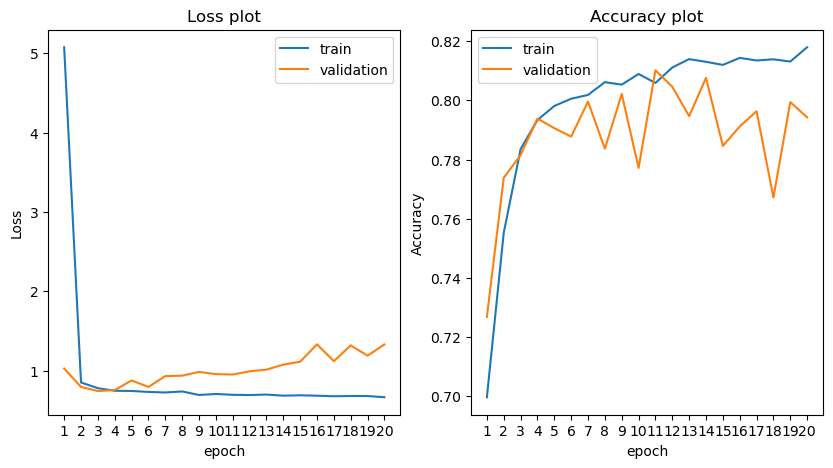

In [20]:
draw_metric_plot2(history4)
#Loss Plot -> 과적합이 되었다 - val(주황) 데이터에서 손실이 증가함

#### Adam 옵티마이저를 이용한 모델의 훈련 손실과 검증 손실

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6370 - loss: 10.3880 - val_accuracy: 0.6692 - val_loss: 0.9327
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7025 - loss: 0.8352 - val_accuracy: 0.7230 - val_loss: 0.7364
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7266 - loss: 0.7293 - val_accuracy: 0.7512 - val_loss: 0.7299
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.6594 - val_accuracy: 0.7558 - val_loss: 0.6531
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7779 - loss: 0.6159 - val_accuracy: 0.7747 - val_loss: 0.6352
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7841 - loss: 0.6051 - val_accuracy: 0.7801 - val_loss: 0.6830
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7921 - loss: 0.5827 - val_accuracy: 0.7814 - val_loss: 0.6069
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7912 - loss: 0.5775 - val_accura

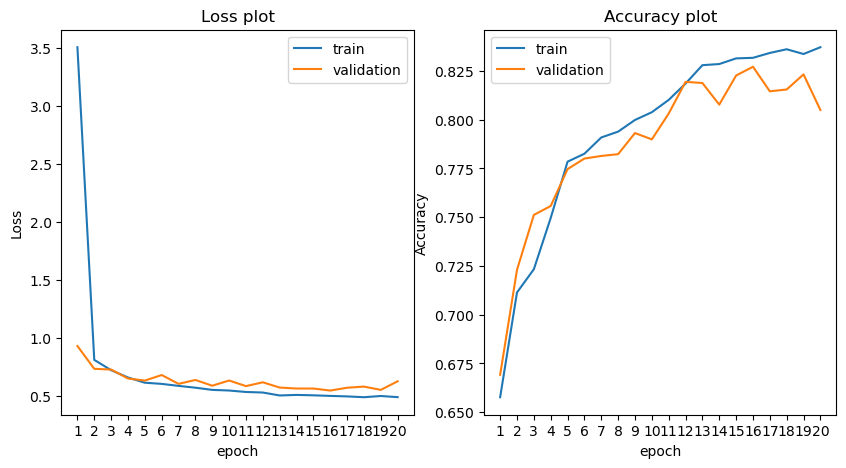

In [21]:
epochs = 20
model6 = build_model()
model6.compile(loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'],
              optimizer='adam')
history5 = model6.fit(X_tr, y_tr, epochs=epochs,
                     validation_data=(X_val, y_val))
draw_metric_plot2(history5)

In [22]:
keys = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
for key in keys:
    print(f"{key}={history4.history[key][-1]:.4f}")

accuracy=0.8180
loss=0.6651
val_accuracy=0.7943
val_loss=1.3299


In [23]:
keys = ['accuracy', 'loss']
for key in keys:
    print(f"{key}={history2.history[key][-1]:.4f}")

accuracy=0.8149
loss=0.6765


In [24]:
keys = ['accuracy', 'loss']
for key in keys:
    print(f"{key}={history.history[key][-1]:.4f}")

accuracy=0.8122
loss=0.6736


#### RMSprop으로 최적화

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.6502 - loss: 13.9330 - val_accuracy: 0.7738 - val_loss: 0.7919
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.7569 - loss: 0.8068 - val_accuracy: 0.7867 - val_loss: 0.7969
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7803 - loss: 0.7471 - val_accuracy: 0.7775 - val_loss: 0.7317
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7906 - loss: 0.7115 - val_accuracy: 0.7861 - val_loss: 0.7247
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.7908 - loss: 0.7203 - val_accuracy: 0.7663 - val_loss: 0.8380
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7921 - loss: 0.7023 - val_accuracy: 0.7675 - val_loss: 1.0050
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7952 - loss: 0.6787 - val_accuracy: 0.7977 - val_loss: 0.9155
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.7925 - loss: 0.7149 - va

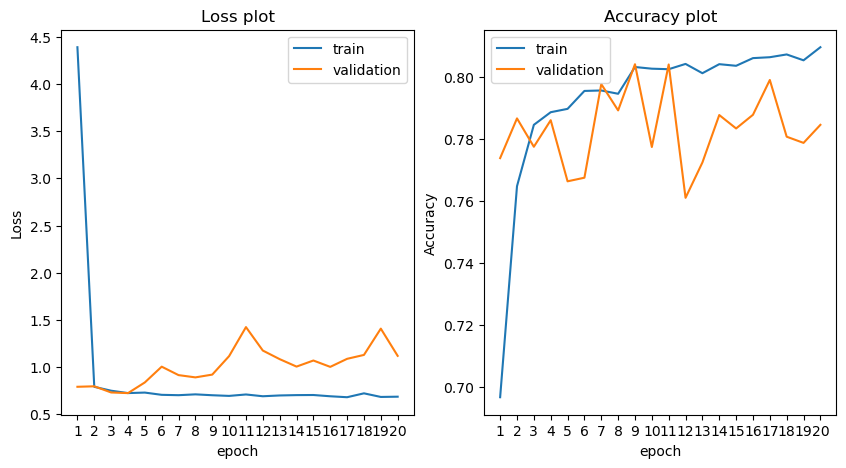

In [25]:
epochs = 20
model7 = build_model()
model7.compile(loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'],
              optimizer='rmsprop')
history6 = model7.fit(X_tr, y_tr, epochs=epochs,
                     validation_data=(X_val, y_val))
draw_metric_plot2(history6)

#### [문제2] 앞의 신경망 모델에 대하여 학습률을 조정하여 변화되는 손실 곡선을 그려보시오.

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6654 - loss: 15.6494 - val_accuracy: 0.6719 - val_loss: 0.9892
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6857 - loss: 0.9215 - val_accuracy: 0.7077 - val_loss: 0.8524
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7281 - loss: 0.7368 - val_accuracy: 0.7417 - val_loss: 0.7359
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7646 - loss: 0.6590 - val_accuracy: 0.7816 - val_loss: 0.6195
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7997 - loss: 0.5625 - val_accuracy: 0.8030 - val_loss: 0.5715
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8223 - loss: 0.5030 - val_accuracy: 0.8163 - val_loss: 0.5123
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8370 - loss: 0.4580 - val_accuracy: 0.8287 - val_loss: 0.5129
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8458 - loss: 0.4353 - val_accura

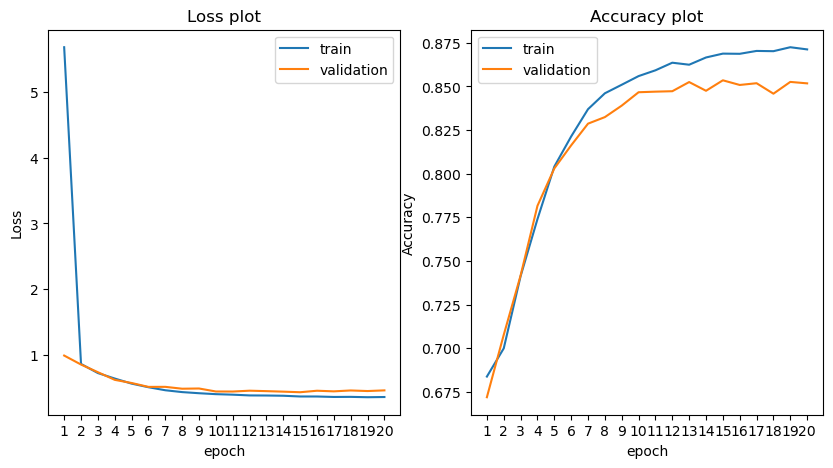

In [26]:
epochs = 20
model8 = build_model()
adam = keras.optimizers.Adam(learning_rate=0.0005)
model8.compile(loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'],
              optimizer=adam)
history7 = model8.fit(X_tr, y_tr, epochs=epochs,
                     validation_data=(X_val, y_val))
draw_metric_plot2(history7)

---

## 드롭아웃(dropout)

: 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey  Hinton)이 소개한 개념
- 은닉층에서 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
- 훈련 중에 적용되며 평가나 예측에서는 적용되지 않음
- 텐서플로는 이를 자동으로 처리

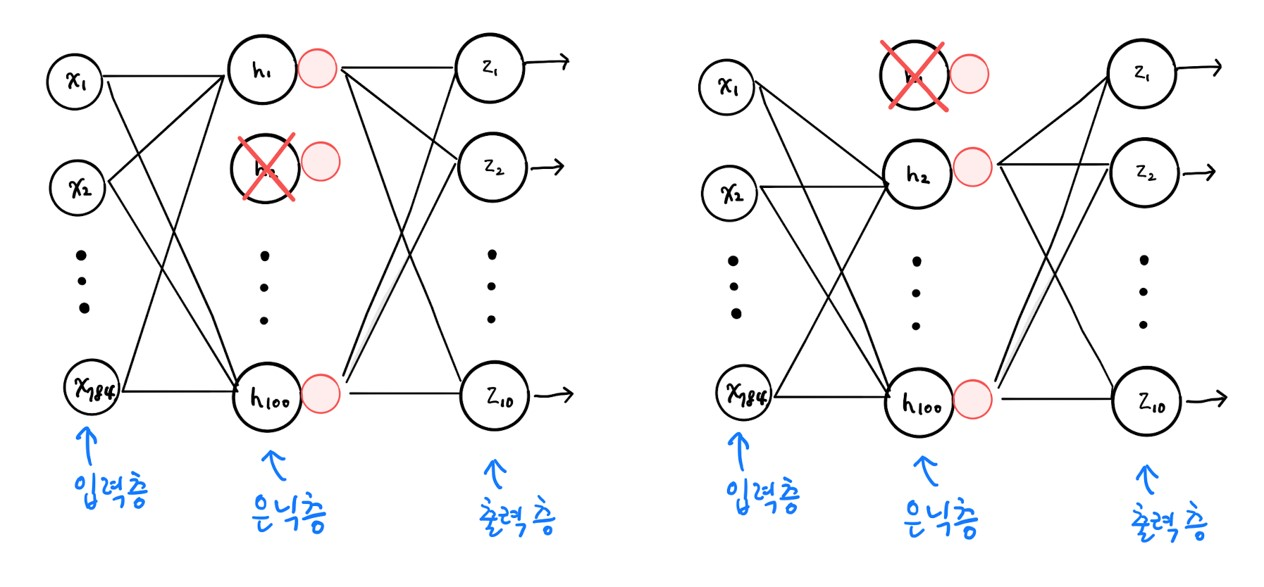

#### 드롭아웃이 과대적합을 막는 이유?

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함 

#### Dropout 클래스

- keras.layres 패키지 아래 제공
    - keras.layers.Dropout(드롭아웃비율)  
    - 드롭아웃하지 않는 뉴런의 출력은 $1/(1-r)$ 만큼 증가시켜 출력의 총합이 같도록 만듬

- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬

In [27]:
# 30% 정도 드롭아웃
model9 = build_model(keras.layers.Dropout(0.3)) 
#30% 제외한 70%만 연결
#epoch 학습 할때마다 랜덤하게 30% 뉴런 제외하고 선택
#제외하고자 하는 층 뒤에 넣어주면 됨 (ex. dense_28)
model9.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

#### 드롭아웃이 적용된 모델의 훈련 손실과 검증 손실 그래프

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4387 - loss: 7.7929 - val_accuracy: 0.6227 - val_loss: 1.0117
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5535 - loss: 1.1917 - val_accuracy: 0.6927 - val_loss: 0.8007
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5944 - loss: 1.0473 - val_accuracy: 0.6733 - val_loss: 0.8541
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6130 - loss: 0.9947 - val_accuracy: 0.7122 - val_loss: 0.7210
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6285 - loss: 0.9568 - val_accuracy: 0.6875 - val_loss: 0.7902
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6430 - loss: 0.9644 - val_accuracy: 0.6728 - val_loss: 0.8151
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6413 - loss: 0.9407 - val_accuracy: 0.7193 - val_loss: 0.7584
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6446 - loss: 0.9277 - 

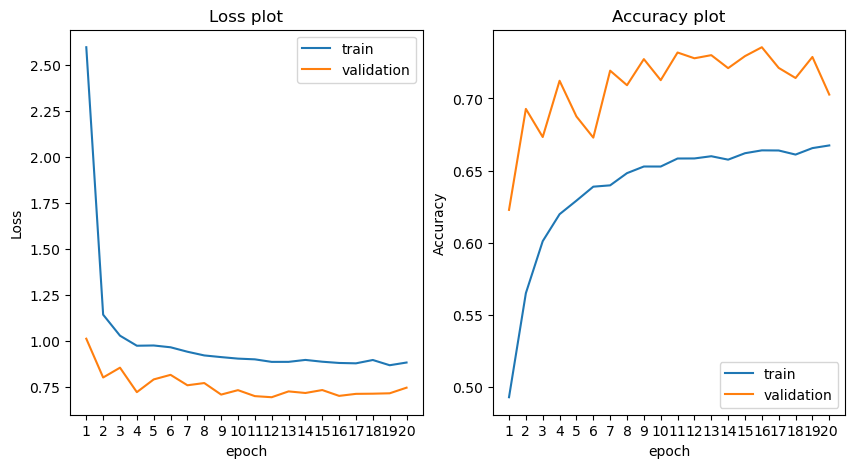

In [28]:
epochs = 20
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
history8 = model9.fit(X_tr, y_tr, epochs=epochs,
                     validation_data=(X_val, y_val))
draw_metric_plot2(history8)

In [29]:
historys = [history5, history6, history7, history8]
keys = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
for i, histo in enumerate(historys):
    print(f'history{i+5}')
    for key in keys:
        print(f"{key}={histo.history[key][-1]:.4f}", end=', ')
    print()

history5
accuracy=0.8372, loss=0.4927, val_accuracy=0.8050, val_loss=0.6293, 
history6
accuracy=0.8097, loss=0.6869, val_accuracy=0.7846, val_loss=1.1195, 
history7
accuracy=0.8712, loss=0.3581, val_accuracy=0.8518, val_loss=0.4592, 
history8
accuracy=0.6674, loss=0.8821, val_accuracy=0.7027, val_loss=0.7453, 


**epochs = 5**
- accuracy: 0.7967 loss: 0.6992

**epochs = 20**
- accuracy: 0.8245 loss: 0.6589

**epochs = 40**
- accuracy: 0.8379 loss: 0.6158

**epochs = 20, optimizer='adam', learning_rate=0.001**
- accuracy: 0.8553 loss: 0.4240 val_accuracy: 0.8398 val_loss: 0.5259

**epochs = 20, optimizer='rmsprop'**
- accuracy: 0.8606 - loss: 0.4097 - val_accuracy: 0.8062 - val_loss: 0.6449

**epochs = 20, optimizer='adam', learning_rate=0.0005**
- accuracy: 0.8703 - loss: 0.3625 - val_accuracy: 0.8572 - val_loss: 0.4625

**epochs = 20, optimizer='adam', learning_rate=0.001**
- accuracy: 0.8444 - loss: 0.4626 - val_accuracy: 0.8374 - val_loss: 0.5508

## 모델 저장과 복원

#### 에포크 횟수를 10으로 지정하고 모델을 훈련

In [30]:
epochs = 10
model10 = build_model(keras.layers.Dropout(0.3))
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
history9 = model10.fit(X_tr, y_tr, epochs=epochs,
                     validation_data=(X_val, y_val))

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4455 - loss: 10.4332 - val_accuracy: 0.5551 - val_loss: 1.1927
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4830 - loss: 1.3555 - val_accuracy: 0.5775 - val_loss: 1.0580
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5209 - loss: 1.2425 - val_accuracy: 0.5785 - val_loss: 1.0470
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5498 - loss: 1.1594 - val_accuracy: 0.6800 - val_loss: 0.8266
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6076 - loss: 1.0355 - val_accuracy: 0.6988 - val_loss: 0.7856
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6284 - loss: 0.9756 - val_accuracy: 0.7256 - val_loss: 0.7255
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6362 - loss: 0.9618 - val_accuracy: 0.6998 - val_loss: 0.7716
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6438 - loss: 0.9437 - val_accura

In [31]:
def print_metric_and_plot(history, title):
    draw_metric_plot2(history)
    print(title)
    keys = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
    for key in keys:
        print(f"{key}={history.history[key][-1]:.4f}", end=', ')
    print()

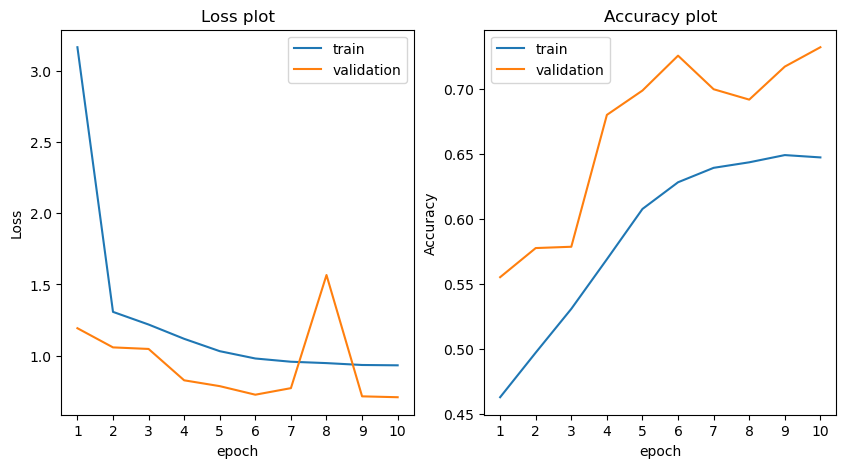

## epoch=10, optimizer=Adam, Dropout=0.3 ##
accuracy=0.6473, loss=0.9320, val_accuracy=0.7321, val_loss=0.7078, 


In [32]:
title = '## epoch=10, optimizer=Adam, Dropout=0.3 ##'
print_metric_and_plot(history9, title)

#### 훈련된 모델의 파라미터를 저장 : save_weights() 메서드  
- 텐서플로의 체크포인트 포맷 또는 HDF5 포맷인 weights.h5 파일로 저장  

In [55]:
model_path = '/Users/crystal.moon/crystal.moon/Python/12_DL/model/'
model10.save_weights(model_path+'FMnist_model.weights.h5') #모델 이름을 넣어줌

In [34]:
%cd /Users/crystal.moon/crystal.moon/Python/12_DL

/Users/crystal.moon/crystal.moon/Python/12_DL


In [35]:
%ls #파일 확인

FMnist_model-weight01.weights.h5
FMnist_model.weights.h5
FMnist_model_whole.h5
model.png
딥러닝01_1_딥러닝과 퍼셉트론.pdf
딥러닝01_2_딥러닝과 퍼셉트론_실습.ipynb
딥러닝02_1_데이터표현과 텐서연산.ipynb
딥러닝02_2_텐서플로와케라스.ipynb
딥러닝04_신경망모델훈련.ipynb
딥러닝05_신경망분류문제1_IMDB리뷰분류.ipynb
딥러닝05_신경망분류문제2_뉴스기사분류.ipynb
딥러닝06_신경망회귀문제_주택가격예측.ipynb
딥러닝03_첫번째신경망DNN.ipynb


#### 훈련된 모델 구조와 파라미터를 함께 저장 : model.save() 메서드   

- 텐서플로의 SavedModel 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [36]:
model10.save(model_path+'FMnist_model_whole.h5')

#### 저장된 파일들 확인

In [37]:
%ls

FMnist_model-weight01.weights.h5
FMnist_model.weights.h5
FMnist_model_whole.h5
model.png
딥러닝01_1_딥러닝과 퍼셉트론.pdf
딥러닝01_2_딥러닝과 퍼셉트론_실습.ipynb
딥러닝02_1_데이터표현과 텐서연산.ipynb
딥러닝02_2_텐서플로와케라스.ipynb
딥러닝04_신경망모델훈련.ipynb
딥러닝05_신경망분류문제1_IMDB리뷰분류.ipynb
딥러닝05_신경망분류문제2_뉴스기사분류.ipynb
딥러닝06_신경망회귀문제_주택가격예측.ipynb
딥러닝03_첫번째신경망DNN.ipynb


#### 새로운 모델에 저장된 훈련모델 가중치를 적용하여 훈련

- load_weights(모델파라미터저장파일명) 메서드

- save_weights()로 저장된 모델과 정확히 같은 구조를 가져야 함

In [38]:
model11 = build_model(keras.layers.Dropout(0.3))
model11.load_weights(model_path+'FMnist_model.weights.h5') #모델 이름을 넣어줌

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### 모델의 검증 정확도 확인

In [39]:
val_proba = model11.predict(X_val)
val_proba[:10]

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


array([[3.32323318e-17, 0.00000000e+00, 9.50490427e-23, 4.27864599e-14,
        1.24028150e-25, 1.31494869e-12, 1.62130285e-16, 5.26263588e-17,
        1.00000000e+00, 1.95626599e-19],
       [2.18048235e-20, 0.00000000e+00, 2.20028560e-27, 1.51257003e-16,
        1.72991579e-30, 6.14266091e-15, 8.90275429e-20, 6.24330659e-20,
        1.00000000e+00, 7.15139771e-23],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.47163558e-03, 0.00000000e+00, 9.97296333e-01,
        5.53132417e-23, 2.32022998e-04],
       [8.84589404e-02, 1.07658915e-02, 2.76407540e-01, 6.04349673e-02,
        2.67531514e-01, 1.06249554e-02, 2.14923233e-01, 1.61115918e-02,
        4.11791392e-02, 1.35623077e-02],
       [2.36166010e-20, 0.00000000e+00, 9.73614342e-29, 5.15245060e-16,
        2.27003156e-30, 8.70676337e-16, 2.36124570e-20, 1.54155925e-19,
        1.00000000e+00, 9.02760051e-23],
       [8.84589404e-02, 1.07658915e-02, 2.76407540e-01, 6.04349673e-02,
   

In [40]:
var_labels = np.argmax(val_proba, axis=-1) #해당하는 10가지 라벨이 나옴

In [41]:
var_labels[:10]

array([8, 8, 7, 2, 8, 2, 1, 0, 2, 5])

#### 모델 전체 파일을 읽은 후 검증 세트의 정확도 출력

- 모델 저장 파일 읽기 : load_model(파일명)
    - load_model() 함수는 모델 파라미터와 모델 구조, 옵티마이저 상태까지 모두 복원
    - evaluate() 메서드 사용 가능

In [42]:
predict_target_names = [target_names[i] for i in var_labels[:10]]
print(predict_target_names)

['Bag', 'Bag', 'Sneaker', 'Pullover', 'Bag', 'Pullover', 'Trouser', 'T-shirt/top', 'Pullover', 'Sandal']


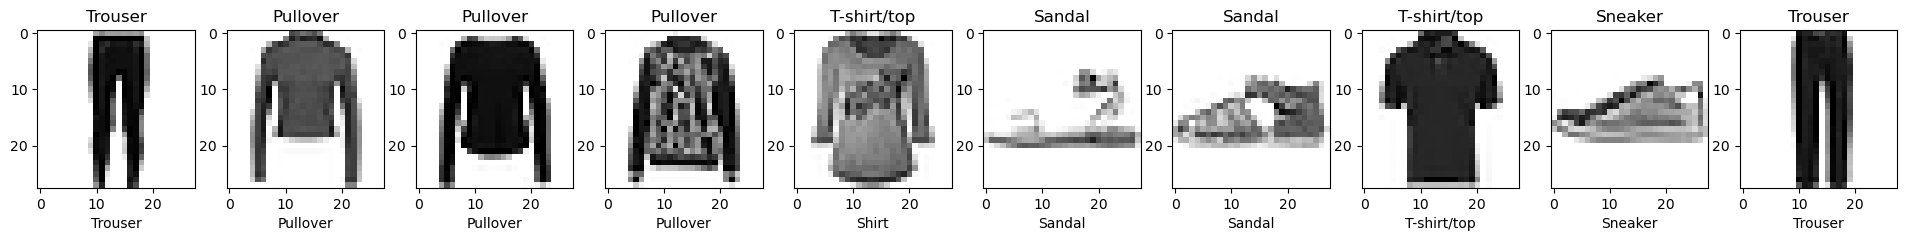

In [43]:
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=10)
for i in range(10):
    img = X_val[i+1000]
    label = y_val[i+1000]
    pred = var_labels[i+1000]
    axs[i].imshow(img, cmap=plt.cm.binary) #cmap = 'gray_r'로 줘도 됨
    axs[i].set_title(target_names[label])  
    axs[i].set_xlabel(target_names[pred])
#     axs[i].axis('off')

In [44]:
model12 = keras.models.load_model(model_path+'FMnist_model_whole.h5')

In [45]:
model12.evaluate(X_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7326 - loss: 0.6948


[0.7077745795249939, 0.7320833206176758]

In [46]:
val_proba = model12.predict(X_val)
np.argmax(val_proba, axis=-1)[:10]

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


array([8, 8, 7, 2, 8, 2, 1, 0, 2, 5])

In [47]:
%ls

FMnist_model-weight01.weights.h5
FMnist_model.weights.h5
FMnist_model_whole.h5
model.png
딥러닝01_1_딥러닝과 퍼셉트론.pdf
딥러닝01_2_딥러닝과 퍼셉트론_실습.ipynb
딥러닝02_1_데이터표현과 텐서연산.ipynb
딥러닝02_2_텐서플로와케라스.ipynb
딥러닝04_신경망모델훈련.ipynb
딥러닝05_신경망분류문제1_IMDB리뷰분류.ipynb
딥러닝05_신경망분류문제2_뉴스기사분류.ipynb
딥러닝06_신경망회귀문제_주택가격예측.ipynb
딥러닝03_첫번째신경망DNN.ipynb


## 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 도와주는 객체
- 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 종료
- keras.callbacks 패키지에 있는 클래스들
- 생성한 콜백객체들은 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달

### ModelCheckpoint 콜백
- 최상의 검증 점수를 만드는 모델 저장 


- keras.callbacks.ModelCheckpoint 클래스
    - 생성자의 인수로 저장할 파일이름 지정
    
    
- 형식 : keras.callbacks.ModelCheckpoint('파일이름', monitor='val_loss', save_weight_only=True)
    - monitor='val_loss' : 검증 손실을 관찰
    - save_weight_only : #가중치만 저장할건지
         - True인 경우 모델의 가중치와 절편만 저장
         - False인 경우 전체 모델을 저장

In [52]:
from keras.callbacks import ModelCheckpoint

model13 = build_model(keras.layers.Dropout(0.3))
model13.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
checkpt_cp = ModelCheckpoint(filepath=model_path+'checkpoint_path.keras',
                             monitor='val_loss', save_best_only=True)
model13.fit(X_tr, y_tr, epochs=20, 
            callbacks=[checkpt_cp],
            validation_data=(X_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4557 - loss: 10.5507 - val_accuracy: 0.5460 - val_loss: 1.2540
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5026 - loss: 1.3255 - val_accuracy: 0.6377 - val_loss: 0.9714
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5907 - loss: 1.1030 - val_accuracy: 0.6935 - val_loss: 0.8049
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6133 - loss: 1.0275 - val_accuracy: 0.7222 - val_loss: 0.7596
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6236 - loss: 0.9901 - val_accuracy: 0.7146 - val_loss: 0.7610
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6225 - loss: 1.0098 - val_accuracy: 0.7276 - val_loss: 0.7079
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6368 - loss: 0.9555 - val_accuracy: 0.7161 - val_loss: 0.7378
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6357 - loss: 0.9558 -

In [53]:
%ls

FMnist_model-weight01.weights.h5
FMnist_model.weights.h5
FMnist_model_whole.h5
checkpoint_path.keras
model.png
딥러닝01_1_딥러닝과 퍼셉트론.pdf
딥러닝01_2_딥러닝과 퍼셉트론_실습.ipynb
딥러닝02_1_데이터표현과 텐서연산.ipynb
딥러닝02_2_텐서플로와케라스.ipynb
딥러닝04_신경망모델훈련.ipynb
딥러닝05_신경망분류문제1_IMDB리뷰분류.ipynb
딥러닝05_신경망분류문제2_뉴스기사분류.ipynb
딥러닝06_신경망회귀문제_주택가격예측.ipynb
딥러닝03_첫번째신경망DNN.ipynb


####  저장된 최상의 검증 점수를 낸 모델을 다시 읽어 예측하기

In [58]:
model_13 = keras.models.load_model(model_path+'checkpoint_path.keras')
model_13.evaluate(X_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.7331 - loss: 0.6905


[0.6990574598312378, 0.7322499752044678]

### 조기 종료 콜백 : EearlyStopping

- 과대적합이 되기 전에 훈련을 미지 중지하는 것
    - 검증점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법
- 계산 비용과 시간 절약
- 훈련 에포크 횟수를 제한하는 역할로 과대적합을 예방 -> 규제 방법 중 하나


- 형식 : keras.callbacks.EarlyStopping(monitor='val_loss', patience, restore_best_weights=False)
    - patience : 검증 점수가 향상되지 않더라도 지속할 수 있는 최대 에포크 횟수
    - restore_best_weights : 최상의 모델 가중치를 복원할지 지정
        - True 인 경우 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
        - 기본값은 False

#### EarlyStopping 콜백과 ModelCheckpoint 콜백을 사용한 모델

In [60]:
from keras.callbacks import EarlyStopping

model14 = build_model(keras.layers.Dropout(0.3))
model14.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
checkpt_cp = ModelCheckpoint(filepath=model_path+'checkpoint_path.keras',
                             monitor='val_loss', save_best_only=True)
early_cp = EarlyStopping(patience=2, restore_best_weights=True)

history14 = model14.fit(X_tr, y_tr, epochs=20, 
            callbacks=[checkpt_cp, early_cp],
            validation_data=(X_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4187 - loss: 10.4056 - val_accuracy: 0.5633 - val_loss: 1.1842
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5409 - loss: 1.2499 - val_accuracy: 0.6640 - val_loss: 0.9312
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5903 - loss: 1.0776 - val_accuracy: 0.7143 - val_loss: 0.7587
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6158 - loss: 1.0112 - val_accuracy: 0.7139 - val_loss: 0.7627
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6239 - loss: 0.9692 - val_accuracy: 0.7177 - val_loss: 0.7294
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6280 - loss: 0.9680 - val_accuracy: 0.6980 - val_loss: 0.7908
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6246 - loss: 1.0039 - val_accuracy: 0.7266 - val_loss: 0.7268
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6315 - loss: 0.9609 -

#### 콜백 객체의 속성 확인

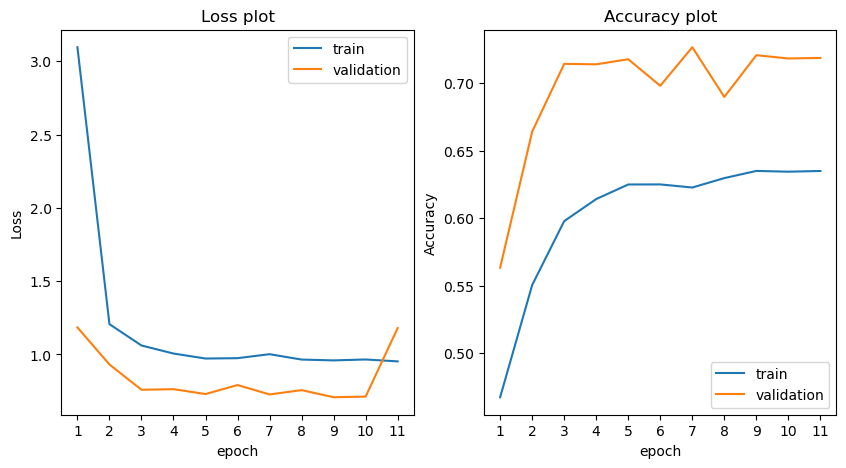

In [61]:
draw_metric_plot2(history14)

In [62]:
early_cp.stopped_epoch #epoch 10에서 끝남 -> 9에서 가장 작음

10

- 조기 종료를 통해 안심하고 에포크 횟수를 크게하여 학습을 진행할 수 있고, ModelCheckPoint 콜백을 통해 최상의 모델을 자동으로 저장해주므로 편리함

#### 조기 종료로 얻은 모델을 사용하여 검증 세트의 성능 확인

In [63]:
model14.evaluate(X_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.7177 - loss: 0.7093


[0.7077687382698059, 0.7206666469573975]

---

### 확인문제

1. 케라스 모델의 fit() 메서드에 검증 세트를 올바르게 전달하는 코드는 무엇인가? ④  

    ① model.fit(... , val_input=val_input, val_target=val_target)       
    ② model.fit(... , validation_input=val_input, validation_target=val_target)       
    ③ model.fit(... , val_data=(val_input, val_target))  
    ④ model.fit(... , validation_data=(val_input, val_target))       

2. 이전 층의 뉴런 출력 중 70%만 사용하기 위해 드롭아웃 층을 추가하려고 한다. 옳게 설정한 것은? ②

    ① Dropout(0.7)    
    ② Dropout(0.3)  
    ③ Dropout(1/0.7)  
    ④ Dropout(1/0.3)

3. 케라스 모델의 가중치만 저장하는 메서드는 무엇인가? ③

    ① save()    
    ② load_model()  
    ③ save_weights()  
    ④ load_weights()      

4. 케라스의 조기 종료 콜백을 사용하려고 한다. 3번의 에포크 동안 손실이 감소되지 않으면 종료하고 최상의 모델 가중치를 복원하도록 설정한 것은 무엇인가? ②

    ① EarlyStopping(monitor='loss', patience=3)  
    ② EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
    ③ EarlyStopping(monitor='accuracy', patience=3)  
    ④ EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)  

### [마무리]

- 드롭아웃(Dropout) 
- 콜백(Callback)
- 조기종료

### [핵심패키지와 함수]

**TensorFlow**

- Dropout : 드롭아웃 층
- save_weights() : 모든 층의 가중치와 절편을 파일에 저장
- load_weights() : save_weights()로 저장된 파일 읽기
- save() : 모델 구조와 모든 가중치와 절편을 파일에 저장
- load_model() : model.save()로 저장된 모델 로드
- ModelCheckpoint : 케라스 모델과 가중치를 일정 간격으로 저장
- EarlyStopping :관심 지표가 더 이상 향상하지 않으면 훈련을 중지

**Numpy**
- agrmax : 배열에서 축을 따라 최대값의 인덱스 반환